In [76]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Data Loading

In [3]:
# Load the dataset
data = pd.read_csv('Books_Data_Clean.csv')

In [4]:
data.shape


(1070, 15)

In [5]:
# Display the first few rows of the dataset
data.head()


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# data processing

In [6]:
# Rename columns for better readability
data.rename(columns={'sale price': 'sale_price', 'Book Name': 'Book_Name', 'Publishing Year': 'Publishing_Year'}, inplace=True)


In [7]:
# Display the distribution of book ratings
rating_counts = data['Book_average_rating'].value_counts().sort_index()
for rating, count in rating_counts.items():
    print(f"Rating {rating}: {count} data points")


Rating 2.97: 1 data points
Rating 3.1: 1 data points
Rating 3.21: 2 data points
Rating 3.22: 1 data points
Rating 3.23: 1 data points
Rating 3.28: 1 data points
Rating 3.29: 1 data points
Rating 3.3: 1 data points
Rating 3.31: 1 data points
Rating 3.32: 1 data points
Rating 3.33: 1 data points
Rating 3.35: 1 data points
Rating 3.37: 1 data points
Rating 3.39: 1 data points
Rating 3.4: 1 data points
Rating 3.41: 3 data points
Rating 3.42: 3 data points
Rating 3.43: 1 data points
Rating 3.45: 1 data points
Rating 3.46: 2 data points
Rating 3.47: 2 data points
Rating 3.48: 4 data points
Rating 3.49: 2 data points
Rating 3.5: 1 data points
Rating 3.51: 3 data points
Rating 3.52: 3 data points
Rating 3.53: 1 data points
Rating 3.54: 1 data points
Rating 3.55: 3 data points
Rating 3.56: 6 data points
Rating 3.57: 4 data points
Rating 3.58: 2 data points
Rating 3.59: 3 data points
Rating 3.6: 5 data points
Rating 3.62: 4 data points
Rating 3.63: 2 data points
Rating 3.64: 5 data points
Rating

In [8]:
# Define a function to map ratings into categories
def map_rating(value):
    if 2.5 <= value < 3.0:
        return "very bad"
    elif 3.0 <= value < 3.5:
        return "bad"
    elif 3.5 <= value < 4.0:
        return "good"
    elif 4.0 <= value < 4.5:
        return "very good"
    elif 4.5 <= value <= 5.0:
        return "excellent"
    else:
        return None


In [9]:
# Apply the mapping function to create a new 'Rating' column
data['Rating'] = data['Book_average_rating'].apply(map_rating)

# Handling Missing Values

In [10]:
data.isnull().sum()


index                   0
Publishing_Year         1
Book_Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale_price              0
sales rank              0
Publisher               0
units sold              0
Rating                  0
dtype: int64

In [11]:
# Drop rows with missing values in specified columns
data.dropna(subset=['Publishing_Year', 'Book_Name'], inplace=True)

In [12]:
# Fill missing values in the 'language_code' column with 'unknown'
data['language_code'].fillna('unknown', inplace=True)


In [13]:
data.isnull().sum()

index                  0
Publishing_Year        0
Book_Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale_price             0
sales rank             0
Publisher              0
units sold             0
Rating                 0
dtype: int64

In [14]:
# Assuming 'Author_Rating' is the categorical variable, create dummy variables
X = pd.get_dummies(data[['sale_price', 'Author_Rating']])

In [15]:
# Define the target variable
y = data['Rating']

# Split the dataset

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Implementation 

In [17]:
# Create a Decision Tree classifier model
decision_tree = DecisionTreeClassifier()

In [18]:
# Train the model on the training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Make predictions on the test data
pred_dt = decision_tree.predict(X_test)

In [20]:
# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, pred_dt)

In [21]:
# Print Decision Tree accuracy
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.8285714285714286


# Data Tuning


In [22]:
# Perform GridSearchCV for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [23]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

c:\Users\chari\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
# Display the best hyperparameters found for Decision Tree
print("Best Hyperparameters (Decision Tree):", grid_search_dt.best_params_)

Best Hyperparameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [25]:

# Use the best model from GridSearchCV for Decision Tree
best_decision_tree = grid_search_dt.best_estimator_

In [26]:
# Make predictions on the test data using the best Decision Tree model
pred_dt_best = best_decision_tree.predict(X_test)

In [27]:
# Evaluate the accuracy of the best Decision Tree model
accuracy_dt_best = accuracy_score(y_test, pred_dt_best)


In [28]:
# Print Decision Tree accuracy with hyperparameter tuning
print("Decision Tree Accuracy (Best Model):", accuracy_dt_best)

Decision Tree Accuracy (Best Model): 0.8380952380952381


# Output

In [29]:
# Get user input for Author Rating and Book Price
user_input_authour_rating = input("Enter Author Rating ('Novice', 'Intermediate', 'Advanced'): ")
user_input_sale_price = float(input("Enter Book Price: "))

In [30]:
# Ensure that the input Author Rating is one of the categories used in training
allowed_ratings = ['Novice', 'Intermediate', 'Advanced']
if user_input_authour_rating not in allowed_ratings:
    print(f"Invalid Author Rating. Allowed values are: {', '.join(allowed_ratings)}")
else:
    # Make sure the input is in the correct format for prediction
    user_input_encoded = pd.get_dummies(pd.Series([user_input_authour_rating]))
    
    # Ensure that the user input columns match the training columns
    missing_cols = set(X_train.columns) - set(user_input_encoded.columns)
    for col in missing_cols:
        user_input_encoded[col] = 0

    user_input_combined = pd.concat([user_input_encoded, pd.Series([user_input_sale_price])], axis=1)
    user_input_combined_array = user_input_combined[X_train.columns].to_numpy()

    # Make a prediction using the trained model
    prediction = best_decision_tree.predict(user_input_combined_array)

    # Map the predicted value back to the original rating categories
    print(f"Predicted Rating for 'your book is': {prediction[0]}")

Invalid Author Rating. Allowed values are: Novice, Intermediate, Advanced


# K-Nearest Neighbors Implementation

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Create a K-Nearest Neighbors classifier model
knn = KNeighborsClassifier()

In [33]:
# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
# Make predictions on the scaled test data
pred_knn = knn.predict(X_test_scaled)

In [35]:
# Evaluate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, pred_knn)

In [36]:
# Print KNN accuracy
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

K-Nearest Neighbors Accuracy: 0.8380952380952381


In [37]:
# Predict probabilities for positive class after fitting the model
prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Data Tuning

In [38]:
knn = KNeighborsClassifier()

In [39]:
# Define a hyperparameter grid for tuning k
param_grid_knn = {
    'n_neighbors': range(1, 21),  # Trying k values from 1 to 20
}

In [40]:
# Perform GridSearchCV for finding the best k
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

c:\Users\chari\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [41]:
# Display the best hyperparameter found for KNN
print("Best Hyperparameter (KNN):", grid_search_knn.best_params_)

Best Hyperparameter (KNN): {'n_neighbors': 16}


In [42]:
# Use the best model from GridSearchCV for KNN
best_knn = grid_search_knn.best_estimator_

In [43]:
# Make predictions on the scaled test data using the best KNN model
pred_knn_best = best_knn.predict(X_test_scaled)


In [44]:
# Evaluate the accuracy of the best KNN model
accuracy_knn_best = accuracy_score(y_test, pred_knn_best)

In [45]:
# Print KNN accuracy with the best k
print("K-Nearest Neighbors Accuracy (Best Model):", accuracy_knn_best)

K-Nearest Neighbors Accuracy (Best Model): 0.8476190476190476


In [46]:
# Plot the accuracy for different k values
k_values = range(1, 21)
accuracy_values = grid_search_knn.cv_results_['mean_test_score']

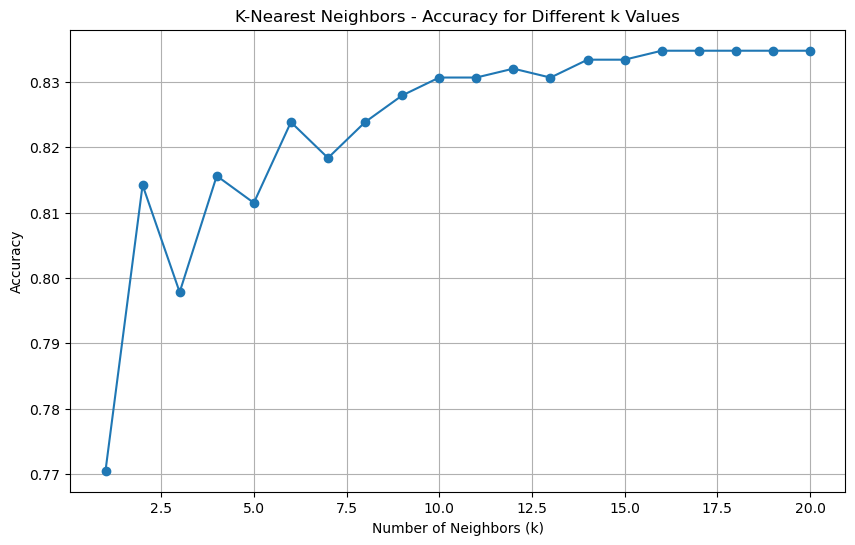

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('K-Nearest Neighbors - Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Output


In [48]:
# Get user input for Author Rating and Book Price
user_input_authour_rating = input("Enter Author Rating ('Novice', 'Intermediate', 'Advanced'): ")
user_input_sale_price = float(input("Enter Book Price: "))

In [49]:
# Ensure that the input Author Rating is one of the categories used in training
allowed_ratings = ['Novice', 'Intermediate', 'Advanced']
if user_input_authour_rating not in allowed_ratings:
    print(f"Invalid Author Rating. Allowed values are: {', '.join(allowed_ratings)}")
else:
    # Make sure the input is in the correct format for prediction
    user_input_encoded = pd.get_dummies(pd.Series([user_input_authour_rating]))
    
    # Ensure that the user input columns match the training columns
    missing_cols = set(X_train.columns) - set(user_input_encoded.columns)
    for col in missing_cols:
        user_input_encoded[col] = 0

    user_input_combined = pd.concat([user_input_encoded, pd.Series([user_input_sale_price])], axis=1)
    user_input_combined_array = user_input_combined[X_train.columns].to_numpy()

    # Make a prediction using the trained model
    prediction = best_knn.predict(user_input_combined_array)

    # Map the predicted value back to the original rating categories
    print(f"Predicted Rating for 'your book is': {prediction[0]}")

Predicted Rating for 'your book is': good


# Visualize and Compare

In [50]:
# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt_best)

In [51]:
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, pred_knn)

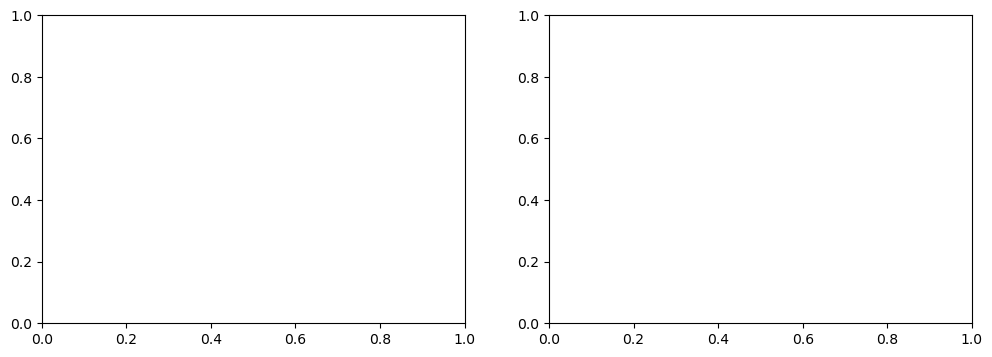

In [52]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

In [53]:
# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

Text(120.72222222222221, 0.5, 'Actual')

In [54]:
# K-Nearest Neighbors Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('K-Nearest Neighbors Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

Text(627.9949494949494, 0.5, 'Actual')

In [55]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [56]:
y_binary = (y == 'excellent').astype(int)
y_test_binary = (y_test == 'excellent').astype(int)

In [57]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
prob_dt = best_decision_tree.predict_proba(X_test)[:, 1]
prob_knn = knn.predict_proba(X_test_scaled)[:,1]

In [59]:
# Compute ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, prob_knn)

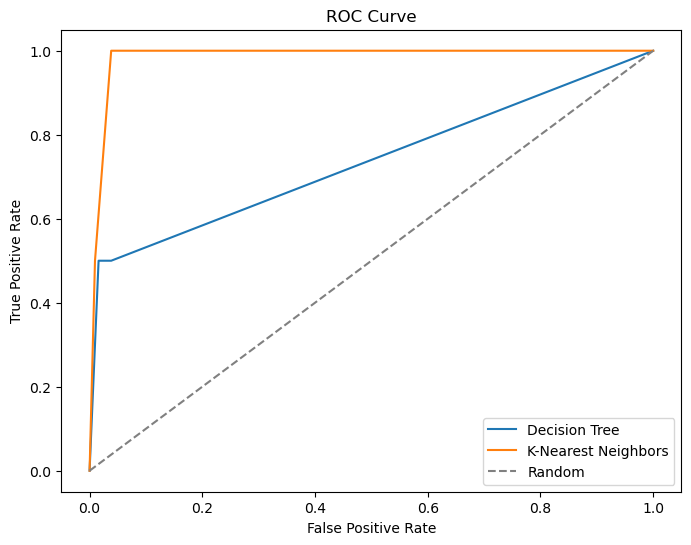

In [60]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [61]:
# Compute Precision-Recall curve and Average Precision
precision_dt, recall_dt, _ = precision_recall_curve(y_test_binary, prob_dt)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_binary, prob_knn)

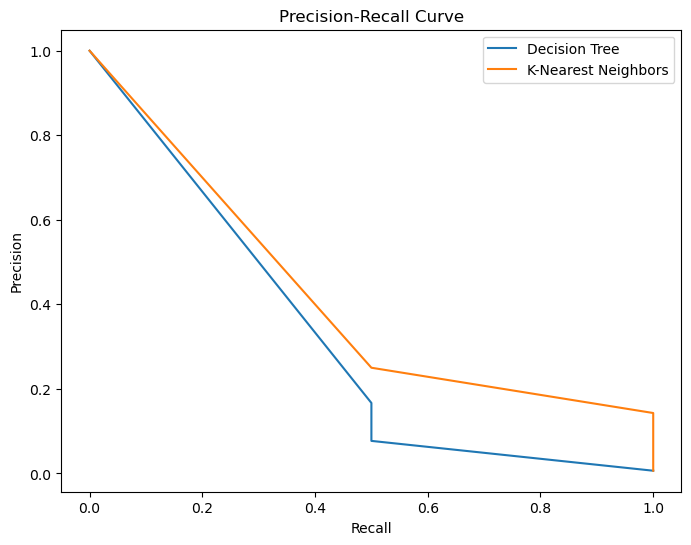

In [62]:
# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.plot(recall_knn, precision_knn, label='K-Nearest Neighbors')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [63]:
cm_dt = confusion_matrix(y_test, pred_dt_best)

In [64]:
cm_knn = confusion_matrix(y_test, pred_knn)

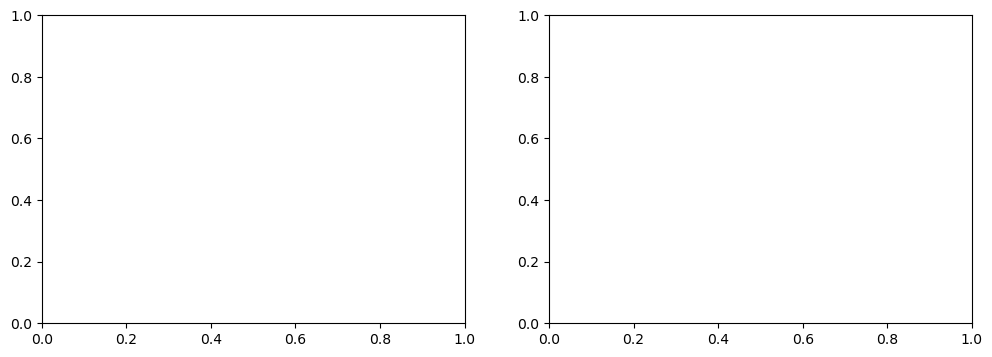

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

In [66]:
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0], annot_kws={"size": 16})
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

Text(120.72222222222221, 0.5, 'Actual')

In [67]:
# K-Nearest Neighbors Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1], annot_kws={"size": 16})
axes[1].set_title('K-Nearest Neighbors Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')


Text(627.9949494949494, 0.5, 'Actual')

In [68]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [69]:
from sklearn.metrics import classification_report

In [70]:
# Classification report for Decision Tree
classification_report_dt = classification_report(y_test, pred_dt_best)
print("Classification Report (Decision Tree):\n", classification_report_dt)

Classification Report (Decision Tree):
               precision    recall  f1-score   support

         bad       1.00      0.60      0.75         5
   excellent       0.17      0.50      0.25         2
        good       0.75      1.00      0.86       135
   very good       0.98      0.72      0.83       173

    accuracy                           0.84       315
   macro avg       0.73      0.71      0.67       315
weighted avg       0.88      0.84      0.84       315



In [71]:
# Classification report for KNN
classification_report_knn = classification_report(y_test, pred_knn)
print("Classification Report (K-Nearest Neighbors):\n", classification_report_knn)

Classification Report (K-Nearest Neighbors):
               precision    recall  f1-score   support

         bad       1.00      0.60      0.75         5
   excellent       0.25      0.50      0.33         2
        good       0.76      0.96      0.85       135
   very good       0.95      0.75      0.84       173

    accuracy                           0.84       315
   macro avg       0.74      0.70      0.69       315
weighted avg       0.86      0.84      0.84       315



In [74]:
from sklearn.model_selection import learning_curve

In [77]:
# Learning curve for Decision Tree
train_sizes_dt, train_scores_dt, valid_scores_dt = learning_curve(best_decision_tree, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

c:\Users\chari\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [78]:
# Learning curve for KNN
train_sizes_knn, train_scores_knn, valid_scores_knn = learning_curve(best_knn, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

c:\Users\chari\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [79]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

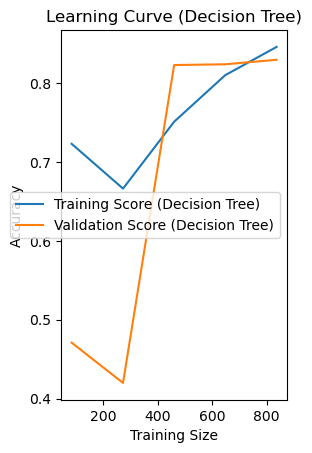

In [80]:

plt.subplot(1, 2, 1)
plt.plot(train_sizes_dt, np.mean(train_scores_dt, axis=1), label='Training Score (Decision Tree)')
plt.plot(train_sizes_dt, np.mean(valid_scores_dt, axis=1), label='Validation Score (Decision Tree)')
plt.title('Learning Curve (Decision Tree)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()

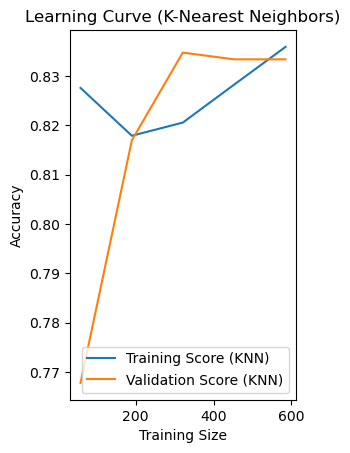

In [81]:
plt.subplot(1, 2, 2)
plt.plot(train_sizes_knn, np.mean(train_scores_knn, axis=1), label='Training Score (KNN)')
plt.plot(train_sizes_knn, np.mean(valid_scores_knn, axis=1), label='Validation Score (KNN)')
plt.title('Learning Curve (K-Nearest Neighbors)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()


In [82]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

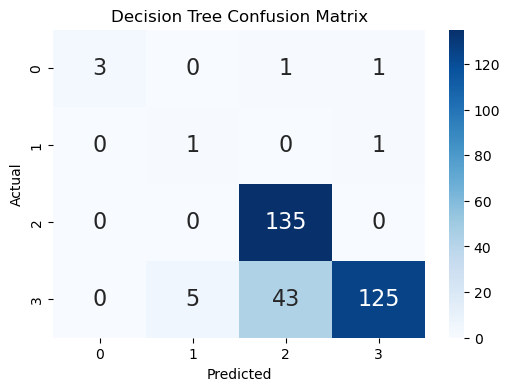

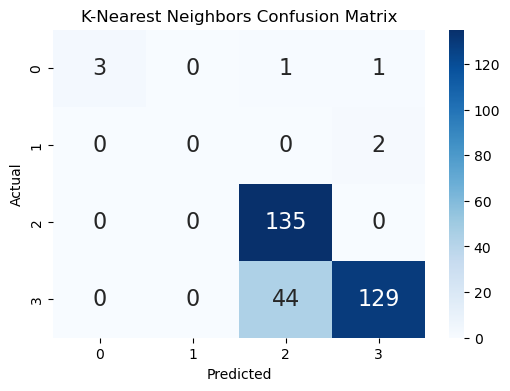

In [83]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt_best)

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, pred_knn_best)

# Function to display confusion matrix with numerical values
def display_confusion_matrix(matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display confusion matrices
display_confusion_matrix(cm_dt, 'Decision Tree')
display_confusion_matrix(cm_knn, 'K-Nearest Neighbors')

In [84]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt_best)

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, pred_knn_best)

# Function to display confusion matrix values
def display_confusion_matrix_values(matrix, model_name):
    print(f'{model_name} Confusion Matrix:')
    print(matrix)

# Display confusion matrix values
display_confusion_matrix_values(cm_dt, 'Decision Tree')
display_confusion_matrix_values(cm_knn, 'K-Nearest Neighbors')

Decision Tree Confusion Matrix:
[[  3   0   1   1]
 [  0   1   0   1]
 [  0   0 135   0]
 [  0   5  43 125]]
K-Nearest Neighbors Confusion Matrix:
[[  3   0   1   1]
 [  0   0   0   2]
 [  0   0 135   0]
 [  0   0  44 129]]
